In [1]:
import numpy as np
import pandas as pd
import sympy as S
from scipy import stats

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
mpl.style.use('seaborn-darkgrid')
mpl.rcParams.update({'font.size': 18})

In [3]:
pd.options.display.max_rows = 10

# Support Vector Machines

Support Vector Machines (SVM) originated from the statistical learning theory
developed by Vapnik-Chervonenkis. As such, it represents a deep application of
statistical theory that incorporates the VC dimension concepts we
discussed in the first section. Let's start by looking at some pictures.
Consider the two-dimensional classification problem shown in
[Figure](#fig:svm_001).  [Figure](#fig:svm_001) shows two classes (gray and
white
circles) that can be separated by any of the lines shown. Specifically, any
such separating line can be written as the locus of points ($\mathbf{x}$) in
the two-dimensional plane that satisfy the following,

<!-- dom:FIGURE: [fig-machine_learning/svm_001.png, width=500 frac=0.45] In the
two-dimensional plane, the two classes (gray and white circles) are easily
separated by any one of the lines shown.   <div id="fig:svm_001"></div>  -->
<!-- begin figure -->
<div id="fig:svm_001"></div>

<p>In the two-dimensional plane, the two classes (gray and white circles) are
easily separated by any one of the lines shown.</p>
<img src="fig-machine_learning/svm_001.png" width=500>

<!-- end figure -->

$$
\beta_0 + \boldsymbol{\beta}^T \mathbf{x} = 0
$$

 To classify  an arbitrary $\mathbf{x}$ using this line, we just
compute the sign of $\beta_0+\boldsymbol{\beta}^T \mathbf{x}$ and assign one
class to the positive sign and the other class to the negative sign.  To
uniquely specify such a separating line (or, hyperplane in a higher-dimensional
space) we need additional criteria.


[Figure](#fig:svm_002) shows the data with two bordering parallel lines that
form a margin around the central separating line.  The *maximal margin
algorithm* finds the widest margin and the unique separating line.  As a
consequence, the algorithm uncovers the elements in the data that touch the
margins. These are the *support* elements. The other elements
away from the border are not relevent to the solution. This reduces
model variance because the solution is insensitive to the removal of
elements other than these supporting elements (usually a small minority).

<!-- dom:FIGURE: [fig-machine_learning/svm_002.png, width=500 frac=0.55] The
maximal margin algorithm finds the separating line that maximizes the margin
shown. The elements that touch the margins are the support elements. The dotted
elements are not relevent to the solution. <div id="fig:svm_002"></div>  -->
<!-- begin figure -->
<div id="fig:svm_002"></div>

<p>The maximal margin algorithm finds the separating line that maximizes the
margin shown. The elements that touch the margins are the support elements. The
dotted elements are not relevent to the solution.</p>
<img src="fig-machine_learning/svm_002.png" width=500>

<!-- end figure -->


To see how this works for linearly separable classes, consider a
training set consisting of $\lbrace (\mathbf{x},y) \rbrace$ where
$y\in \lbrace -1,1 \rbrace$. For any point $\mathbf{x}_i$, we
compute the functional margin as $\hat{ \gamma_i }=y_i (\beta_0 +
\boldsymbol{\beta}^T \mathbf{x}_i)$. Thus, $\hat{\gamma}_i >0$ when
$\mathbf{x}_i$ is correctly classified. The geometrical margin is
$\gamma = \hat{\gamma}/\lVert\boldsymbol{\beta}\rVert$. When
$\mathbf{x}_i$ is correctly classified, the geometrical margin is
equal to the perpendicular distance from $\mathbf{x}_i$ to the line.
Let's look see how the maximal margin algorithm works.

Let $M$ be the width of the margin.  The maximal margin algorithm is can be
formulated as a quadratic programming problem. We want to simultaneously
maximize the margin $M$ while ensuring that all of the data points are
correctly classified.

$$
\begin{aligned}
& \underset{\beta_0,\boldsymbol{\beta},\lVert\boldsymbol{\beta}\rVert=1}{\text{m
aximize}}
& & M \\\
& \text{subject to:}
& & y_i(\beta_0+\boldsymbol{\beta}^T \mathbf{x}_i) \geq M, \; i = 1, \ldots, N.
\end{aligned}
$$

 The first line says we want to generate a maximum value for $M$ by
adjusting $\beta_0$ and $\boldsymbol{\beta}$ while keeping
$\lVert\boldsymbol{\beta}\rVert=1$. The functional margins for each $i^{th}$
data element are the constraints to the problem and must be satisfied for every
proposed solution. In words, the constraints enforce that the elements have to
be correctly classified and outside of the margin around the separating line.
With some reformulation, it turns out that
$M=1/\lVert\boldsymbol{\beta}\rVert$ and this can be put into the following
standard format,

$$
\begin{aligned}
& \underset{\beta_0,\boldsymbol{\beta}}{\text{minimize}}
& & \lVert\boldsymbol{\beta}\rVert \\\
& \text{subject to:}
& & y_i(\beta_0+\boldsymbol{\beta}^T \mathbf{x}_i) \geq 1, \; i = 1, \ldots, N.
\end{aligned}
$$

 This is a convex optimization problem  and can be solved using
powerful
methods in that area.

The situation becomes more complex when the two classes are not separable and
we have to allow some unavoidable mixing between the two classes in the
solution. This means that the contraints have to modified as in the following,

$$
y_i(\beta_0+\boldsymbol{\beta}^T \mathbf{x}_i) \geq M(1-\xi_i)
$$

 where the $\xi_i$ are the slack variables and represent the
proportional amount tha the prediction is on the wrong side of the margin. Thus,
elements are misclassified when $\xi_i>1$. With these additional variables,
we have a more general formulation of the convex optimization problem,

$$
\begin{aligned}
& \underset{\beta_0,\boldsymbol{\beta}}{\text{minimize}}
& & \lVert\boldsymbol{\beta}\rVert \\\
& \text{subject to:}
& & y_i(\beta_0+\boldsymbol{\beta}^T \mathbf{x}_i) \geq 1-\xi_i, \\\
& & & \xi_i \geq 0, \sum \xi_i \leq \texttt{constant}, \; i = 1, \ldots, N.
\end{aligned}
$$

 which can be rewritten in the following equivalent form,

<!-- Equation labels as ordinary links -->
<div id="eq:svm"></div>

$$
\begin{equation}
\begin{aligned}
& \underset{\beta_0,\boldsymbol{\beta}}{\text{minimize}}
& & \frac{1}{2}\lVert\boldsymbol{\beta}\rVert + C \sum \xi_i \\\
& \text{subject to:}
& & y_i(\beta_0+\boldsymbol{\beta}^T \mathbf{x}_i) \geq 1-\xi_i, \xi_i \geq 0 \;
i = 1, \ldots, N.
\end{aligned}
\end{equation}
\label{eq:svm} \tag{1}
$$

 Because the $\xi_i$ terms are all positive, the objective
is to maximize the margin (i.e., minimize $\lVert\boldsymbol{\beta}\rVert$)
while minimizing the proportional drift of the predictions to the wrong side
of the margin (i.e., $C \sum \xi_i$). Thus, large values of $C$ shunt
algorithmic focus towards the correctly classified points near the
decision boundary and small values focus on further data. The value $C$ is
a hyperparameter for the SVM.

The good news is that all of these complicated pieces are handled neatly inside
of Scikit-learn. The following sets up the linear *kernel* for the SVM (more on
kernels soon),

In [3]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
sv = SVC(kernel='linear')

We can create some synthetic data using `make_blobs` and then
fit it to the SVM,

In [4]:
X,y=make_blobs(n_samples=200, centers=2, n_features=2,
               random_state=0,cluster_std=.5)
sv.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

After fitting, the SVM now has the estimated support vectors and the
coefficients of the $\boldsymbol{\beta}$  in the `sv.support_vectors_` and
`sv.coef_` attributes, respectively. [Figure](#fig:svm_003) shows the two
sample classes (white and gray circles) and the line separating them that was
found by the maximal margin algorithm. The two parallel dotted lines show  the
margin. The large circles enclose the support vectors, which are the data
elements that are relevent to the solution. Notice that only these elements
can touch the edges of the margins.

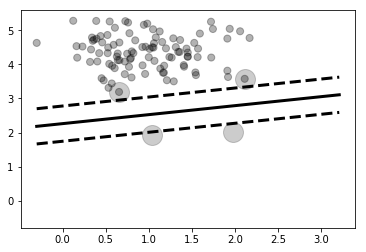

In [5]:
%matplotlib inline

from matplotlib.pylab import subplots
import numpy as np
xi = np.linspace(X[:,0].min(),X[:,0].max(),100)

fig,ax=subplots()
_=ax.scatter(X[:,0],X[:,1],c=y,s=50,cmap='gray',marker='o',alpha=.3)
_=ax.plot(sv.support_vectors_[:,0],sv.support_vectors_[:,1],'ko',markersize=20,alpha=.2)
_=ax.plot(xi,-sv.coef_[0,0]/sv.coef_[0,1]*xi- sv.intercept_/sv.coef_[0,1],'k',lw=3.)
margin = np.linalg.norm(sv.coef_)
_=ax.plot(xi,-sv.coef_[0,0]/sv.coef_[0,1]*xi-(sv.intercept_+margin/2.)/sv.coef_[0,1],'--k',lw=3.)
_=ax.plot(xi,-sv.coef_[0,0]/sv.coef_[0,1]*xi-(sv.intercept_-margin/2.)/sv.coef_[0,1],'--k',lw=3.)

<!-- dom:FIGURE: [fig-machine_learning/svm_003.png, width=500 frac=0.75]  The
two class shown (white and gray circles) are linearly separable. The maximal
margin solution is shown by the dark black line in the middle. The dotted lines
show the extent of the margin.  The large circles indicate the support vectors
for the maximal margin solution. <div id="fig:svm_003"></div> -->
<!-- begin figure -->
<div id="fig:svm_003"></div>

<p>The two class shown (white and gray circles) are linearly separable. The
maximal margin solution is shown by the dark black line in the middle. The
dotted lines show the extent of the margin.  The large circles indicate the
support vectors for the maximal margin solution.</p>
<img src="fig-machine_learning/svm_003.png" width=500>

<!-- end figure -->

In [6]:

def draw_margins(sv,X,y,ax=None):
    sv.fit(X,y)
    xi = np.linspace(X[:,0].min(),X[:,0].max(),100)
    if ax is None: fig,ax=subplots()
    _=ax.scatter(X[:,0],X[:,1],c=y,s=50,cmap='gray',marker='o',alpha=.3)
    _=ax.plot(sv.support_vectors_[:,0],sv.support_vectors_[:,1],'ko',markersize=20,alpha=.2)
    _=ax.plot(xi,-sv.coef_[0,0]/sv.coef_[0,1]*xi- sv.intercept_/sv.coef_[0,1],'k',lw=3.)
    margin = np.linalg.norm(sv.coef_)
    _=ax.plot(xi,-sv.coef_[0,0]/sv.coef_[0,1]*xi- (sv.intercept_+margin/2.)/sv.coef_[0,1],'--k',lw=3.)
    _=ax.plot(xi,-sv.coef_[0,0]/sv.coef_[0,1]*xi- (sv.intercept_-margin/2.)/sv.coef_[0,1],'--k',lw=3.)

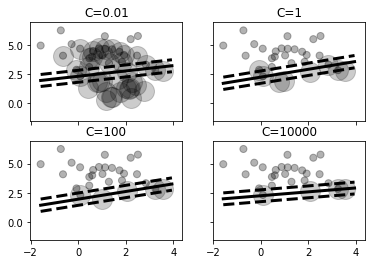

In [7]:

X, y = make_blobs(n_samples=50, centers=2, n_features=2,
                  cluster_std=1,random_state=0)

fig,axs = subplots(2,2,sharex=True,sharey=True)
#fig.set_size_inches((12,6))
sv = SVC(kernel='linear',C=.0100)
draw_margins(sv,X,y,ax=axs[0,0])
_=axs[0,0].set_title('C=0.01')
sv = SVC(kernel='linear',C=1)
draw_margins(sv,X,y,ax=axs[0,1])
_=axs[0,1].set_title('C=1')
sv = SVC(kernel='linear',C=100)
draw_margins(sv,X,y,ax=axs[1,0])
_=axs[1,0].set_title('C=100')
sv = SVC(kernel='linear',C=10000)
draw_margins(sv,X,y,ax=axs[1,1])
_=axs[1,1].set_title('C=10000')

[Figure](#fig:svm_004) shows what happens when the value of $C$ changes.
Increasing this value emphasizes the $\xi$ part of the objective function in
Equation [eq:svm](#eq:svm). As shown in the top left panel, a small value for
$C$ means that
the algorithm is willing to accept many support vectors at the expense of
maximizing the margin. That is, the proportional amount that predictions are on
the wrong side of the margin is more acceptable with smaller $C$.  As the value
of $C$ increases, there are fewer support vectors because the optimization
process prefers to eliminate support vectors that are far away from the margins
and accept fewer of these that encroach into the margin. Note that as the value
of $C$ progresses through this figure, the separating line tilts slightly.

<!-- dom:FIGURE: [fig-machine_learning/svm_004.png, width=500 frac=0.95] The
maximal margin algorithm finds the separating line that maximizes the margin
shown. The elements that touch the margins are the support elements. The dotted
elements are not relevent to the solution. <div id="fig:svm_004"></div>  -->
<!-- begin figure -->
<div id="fig:svm_004"></div>

<p>The maximal margin algorithm finds the separating line that maximizes the
margin shown. The elements that touch the margins are the support elements. The
dotted elements are not relevent to the solution.</p>
<img src="fig-machine_learning/svm_004.png" width=500>

<!-- end figure -->


## Kernel Tricks

Support Vector Machines provide a powerful method to deal with linear
separations, but they can also apply to non-linear boundaries by
exploiting the so-called *kernel trick*.  The convex optimization
formulation of the SVM includes a *dual* formulation that leads to a
solution that requires only the inner-products of the features. The
kernel trick is to substitute inner-products by nonlinear kernel
functions.  This can be thought of as mapping the original features
onto a possibly infinite dimensional space of new features.  That is,
if the data are not linearly separable in two-dimensional space (for
example) maybe they are separable in three-dimensional space (or
higher)?

To make this concrete, suppose the original input space is
$\mathbb{R}^n$ and we want to use a non-linear mapping
$\psi:\mathbf{x} \mapsto \mathcal{F}$ where $\mathcal{F}$ is an
inner-product space of higher dimension.  The kernel trick is to
calculate the inner-product in $\mathcal{F}$ using a kernel
function, $K(\mathbf{x}_i,\mathbf{x}_j) = \langle
\psi(\mathbf{x}_i),\psi(\mathbf{x}_j)\rangle$. The long way to
compute this is to first compute $\psi(\mathbf{x})$ and then do the
inner-product. The kernel-trick way to do it is to use the kernel
function and avoid computing $\psi$. In other words, the kernel
function returns what the inner-product in $\mathcal{F}$ would have
returned if $\psi$ had been applied. For example, to achieve an
$n^{th}$ polynomial mapping of the input space, we can use
$\kappa(\mathbf{x}_i,\mathbf{x}_j)=(\mathbf{x}_i^T\mathbf{x}_j+\theta)^n$.
For example, suppose the input space is $\mathbb{R}^2$ and
$\mathcal{F}=\mathbb{R}^4$ and we have the following mapping,

$$
\psi(\mathbf{x}) : (x_0,x_1) \mapsto (x_0^2,x_1^2,x_0 x_1, x_1 x_0)
$$

 The inner product in $\mathcal{F}$ is then,

$$
\langle \psi(\mathbf{x}),\psi(\mathbf{y})  \rangle = \langle
\mathbf{x},\mathbf{y}  \rangle^2
$$

 In other words, the kernel is the square of the inner
product in input space. The advantage of using the kernel instead of
simply enlarging the feature space is computational because you only
need to compute the kernel on all distinct pairs of the input space.
The following example should help make this concrete. First we create
some Sympy variables,

In [8]:
import sympy as S
x0,x1=S.symbols('x:2',real=True)
y0,y1=S.symbols('y:2',real=True)

Next, we create the $\psi$ function that maps into $\mathbb{R}^4$
and the corresponding kernel function,

In [9]:
psi = lambda x,y: (x**2,y**2,x*y,x*y)
kern = lambda x,y: S.Matrix(x).dot(y)**2

Notice that the inner product in $\mathbb{R}^4$  is
equal to the kernel function, which only uses wthe $\mathbb{R}^2$
variables.

In [11]:
print(S.Matrix(psi(x0,x1)).dot(psi(y0,y1)))
print(S.expand(kern((x0,x1),(y0,y1)))) # same as above

x0**2*y0**2 + 2*x0*x1*y0*y1 + x1**2*y1**2
x0**2*y0**2 + 2*x0*x1*y0*y1 + x1**2*y1**2


**Polynomial Regression Using Kernels.**  Recall our favorite
linear regression problem from the regularization chapter,

$$
\min_{\boldsymbol{\beta}}  \Vert y - \mathbf{X}\boldsymbol{\beta}\Vert^2
$$

 where $\mathbf{X}$ is a $n\times m$ matrix with $m>n$. As
we discussed, there are multiple solutions to this problem. The
least-squares solution is the following:

$$
\boldsymbol{\beta}_{LS}=\mathbf{X}^T(\mathbf{X}\mathbf{X}^T)^{\text{-1}}\mathbf{
y}
$$

 Given a new feature vector $\mathbf{x}$, the corresponding estimator
for $\mathbf{y}$ is the following,

$$
\hat{\mathbf{y}} = \mathbf{x}^T\boldsymbol{\beta}_{LS}=\mathbf{x}^T\mathbf{X}^T(
\mathbf{X}\mathbf{X}^T)^{\text{-1}}\mathbf{y}
$$

 Using the kernel trick, the solution can be written more generally as
the following,

$$
\hat{\mathbf{y}}=\mathbf{k}(\mathbf{x})^T\mathbf{K}^{\text{-1}}\mathbf{y}
$$

 where the $n\times n$ kernel matrix $\mathbf{K}$ replaces
$\mathbf{X}\mathbf{X}^T$ and where $\mathbf{k}(\mathbf{x})$ is a $n$-vector of
components $\mathbf{k}(\mathbf{x})=[\kappa(\mathbf{x}_i,\mathbf{x})]$ and where
$\mathbf{K}_{i,j}=\kappa(\mathbf{x}_i,\mathbf{x}_j)$ for the kernel function
$\kappa$.  With this more general setup, we can substitute
$\kappa(\mathbf{x}_i,\mathbf{x}_j)=(\mathbf{x}_i^T\mathbf{x}_j+\theta)^n$ for
$n^{th}$-order polynomial regression [[bauckhagenumpy]](#bauckhagenumpy). Note
that ridge
regression can also be incorporated by inverting $(\mathbf{K}+\alpha
\mathbf{I})$, which can help stabilize poorly conditioned $\mathbf{K}$ matrices
with a tunable $\alpha$ hyper-parameter [[bauckhagenumpy]](#bauckhagenumpy).

For some kernels, the enlarged $\mathcal{F}$ space is infinite-dimensional.
Mercer's conditions provide technical restrictions on the kernel functions.
Powerful, well-studied kernels have been implemented in Scikit-learn. The
advantage of kernel functions may evaporate for when $n\rightarrow m$ in which
case using the $\psi$ functions instead can be more practicable.

<!-- !bt -->
<!-- \begin{pyconsole} -->
<!-- sv = SVC(kernel='rbf',C=1000) -->
<!-- sv.fit(X,y) -->
<!-- \end{pyconsole} -->
<!-- !et -->

<!-- FIGURE: [fig-machine_learning/svm_005.png, width=500 frac=0.85] Using a
radial basis function kernel, the SVM can generate a curved separating surface
that can classify the two classes shown. <div id="fig:svm_005"></div> -->

<!-- As shown in [Figure](#fig:svm_002), the maximal margin algorithm finds the
-->
<!-- separating line that maximizes the margin shown. As a result, the data
shown by -->
<!-- the dotted circles are no longer relevant to the *support* of the line.
That -->
<!-- is, the dotted circles could be removed with changing the final result. -->

<!-- Kernel trick -->
<!-- objective function includes VC dimension -->

<!-- *Modern Multivariate Statistical Techniques Izenman, p. 371* -->
<!-- *Learning and Soft computing by Kecman, p.154, 171, 186* -->
<!-- *Mastering machine learning with Scikit-learn, p.174* -->
<!-- *Gaussian Processes for Machine Learning, p. 163* -->
<!-- *Elements of statistical learning p.418* -->
<!-- *Kernel methods pattern Taylor p.43* -->
<!-- *Learning with Kernels, p.43* -->
<!-- *An Intro to Machine Learning by james, p.362* -->

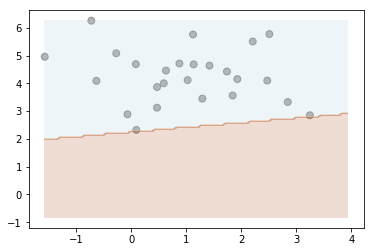

In [12]:
from matplotlib.pylab import cm
xi = np.linspace(X[:,0].min(),X[:,0].max(),100)
yi = np.linspace(X[:,1].min(),X[:,1].max(),100)

fig,ax=subplots()
_=ax.scatter(X[:,0],X[:,1],c=y,s=50,cmap='gray',marker='o',alpha=.3)
Xi,Yi = np.meshgrid(xi,yi)
Zi=sv.predict(np.c_[Xi.ravel(),Yi.ravel()]).reshape(Xi.shape)

_=ax.contourf(Xi,Yi,Zi,cmap=cm.Paired,alpha=0.2);

# Principal Component Analysis

The features from a particular dataset that will ultimately prove important for
machine learning can be difficult to know ahead of time.  This is especially
true for problems that do not have a strong physical underpinning. The
row-dimension of the input matrix ($X$) for fitting data in Scikit-learn is the
number of samples and the column dimension is the number of features. There may
be a large number of column dimensions in this matrix, and the purpose of
dimensionality reduction is to somehow reduce these to only those columns that
are important for the machine learning task.

Fortunately, Scikit-learn provides some powerful tools to help uncover the most
relevant features.  Principal Component Analysis (PCA) consists of taking
the input $X$ matrix and (1) subtracting the mean, (2) computing the covariance
matrix, and (3) computing the eigenvalue decomposition of the covariance
matrix. For example, if $X$ has more columns than is practicable for a
particular learning method, then PCA can reduce the number of columns to a more
manageable number.  PCA is widely used in statistics and other areas beyond
machine learning, so it is worth examining what it does in some detail. First,
we need the decomposition module from Scikit-learn.

In [2]:
from sklearn import decomposition
import numpy as np
pca = decomposition.PCA()

Let's create some very simple data and apply PCA.

In [3]:
x = np.linspace(-1,1,30)
X = np.c_[x,x+1,x+2] # stack as columns
pca.fit(X)
print(pca.explained_variance_ratio_)

[  1.00000000e+00   4.44789028e-32   6.56191018e-33]


**Programming Tip.**

The `np.c_` is a shorcut method for creating stacked column-wise arrays.




 In this example, the columns are just constant offsets of the first
column. The *explained variance ratio* is the percentage of the variance
attributable to the transformed columns of `X`. You can think of this as the
information that is relatively concentrated in each column of the transformed
matrix `X`. [Figure](#fig:pca_001) shows the graph of this dominant
transformed column in the bottom panel.

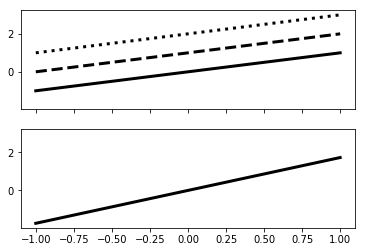

In [4]:
%matplotlib inline

from matplotlib.pylab import subplots
fig,axs = subplots(2,1,sharex=True,sharey=True)
ax = axs[0]
_=ax.plot(x,X[:,0],'-k',lw=3)
_=ax.plot(x,X[:,1],'--k',lw=3)
_=ax.plot(x,X[:,2],':k',lw=3)
ax=axs[1]
_=ax.plot(x,pca.fit_transform(X)[:,0],'-k',lw=3)
#ax.tick_params(labelsize='x-large')

<!-- dom:FIGURE: [fig-machine_learning/pca_001.png, width=500 frac=0.75]  The
top panel shows the columns of the feature matrix and the bottom panel shows the
dominant component that PCA has extracted.  <div id="fig:pca_001"></div> -->
<!-- begin figure -->
<div id="fig:pca_001"></div>

<p>The top panel shows the columns of the feature matrix and the bottom panel
shows the dominant component that PCA has extracted.</p>
<img src="fig-machine_learning/pca_001.png" width=500>

<!-- end figure -->


 To make this more interesting, let's change the slope of each of the
columns as
in the following,

In [5]:
X = np.c_[x,2*x+1,3*x+2,x] # change slopes of columns
pca.fit(X)
print(pca.explained_variance_ratio_)

[  1.00000000e+00   1.36443189e-32   1.71524927e-33   3.68262901e-34]


However, changing the slope did not impact the explained variance
ratio. Again, there is still only one dominant column. This means that PCA is
invariant to both constant offsets and scale changes. This works for functions
as well as simple lines,

In [6]:
x = np.linspace(-1,1,30)
X = np.c_[np.sin(2*np.pi*x),
          2*np.sin(2*np.pi*x)+1,
          3*np.sin(2*np.pi*x)+2] 
pca.fit(X)
print(pca.explained_variance_ratio_)

[  1.00000000e+00   3.63254364e-32   3.47777102e-33]


Once again, there is only one dominant column, which is shown in the
bottom panel of [Figure](#fig:pca_002). The top panel shows the individual
columns of the feature matrix. To sum up, PCA is able to identify and eliminate
features that are merely linear transformations of existing features. This also
works when there is additive noise in the features, although more samples are
needed to separate the uncorrelated noise from between features.

<!-- dom:FIGURE: [fig-machine_learning/pca_002.png, width=500 frac=0.85] The top
panel shows the columns of the feature matrix and the bottom panel shows the
dominant component that PCA has computed. <div id="fig:pca_002"></div>  -->
<!-- begin figure -->
<div id="fig:pca_002"></div>

<p>The top panel shows the columns of the feature matrix and the bottom panel
shows the dominant component that PCA has computed.</p>
<img src="fig-machine_learning/pca_002.png" width=500>

<!-- end figure -->

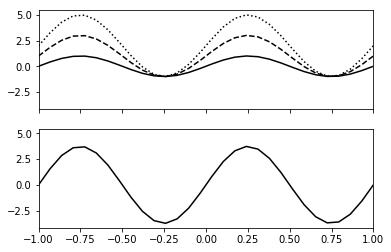

In [7]:
fig,axs = subplots(2,1,sharex=True,sharey=True)
ax = axs[0]
_=ax.plot(x,X[:,0],'-k')
_=ax.plot(x,X[:,1],'--k')
_=ax.plot(x,X[:,2],':k')
ax=axs[1]
_=ax.axis(xmin=-1,xmax=1)
_=ax.plot(x,pca.fit_transform(X)[:,0],'-k')
# ax.tick_params(labelsize='x-large')

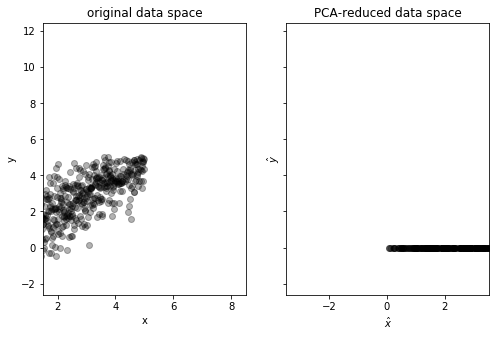

In [8]:
fig,axs=subplots(1,2,sharey=True)
fig.set_size_inches((8,5))
ax=axs[0]
ax.set_aspect(1/1.6)
_=ax.axis(xmin=-2,xmax=12)
x1 = np.arange(0, 10, .01/1.2)
x2 = x1+ np.random.normal(loc=0, scale=1, size=len(x1))
X = np.c_[(x1, x2)]
good = (x1>5) | (x2>5) 
bad = ~good
_=ax.plot(x1[good],x2[good],'ow',alpha=.3)
_=ax.plot(x1[bad],x2[bad],'ok',alpha=.3)
_=ax.set_title("original data space")
_=ax.set_xlabel("x")
_=ax.set_ylabel("y")

_=pca.fit(X)
Xx=pca.fit_transform(X)
ax=axs[1]
ax.set_aspect(1/1.6)
_=ax.plot(Xx[good,0],Xx[good,1]*0,'ow',alpha=.3)
_=ax.plot(Xx[bad,0],Xx[bad,1]*0,'ok',alpha=.3)
_=ax.set_title("PCA-reduced data space")
_=ax.set_xlabel(r"$\hat{x}$")
_=ax.set_ylabel(r"$\hat{y}$")

To see how PCA can simplify machine learning tasks, consider
[Figure](#fig:pca_003) wherein the two classes are separated along the diagonal.
After PCA, the transformed data lie along a single axis where the two classes
can be split using a one-dimensional interval, which greatly simplifies the
classification task. The class identities are preserved under PCA because the
principal component is along the same direction that the classes are separated.
On the other hand, if the classes are separated along the direction
*orthogonal* to the principal component, then the two classes become mixed
under PCA and the classification task becomes much harder. Note that in both
cases, the `explained_variance_ratio_` is the same because the explained
variance ratio does not account for class membership.

<!-- dom:FIGURE: [fig-machine_learning/pca_003.png, width=500 frac=0.85]  The
left panel shows the original two-dimensional data space of two easily
distinguishable classes and the right panel shows the reduced the data space
transformed using PCA. Because the two classes are separated along the principal
component discovered by PCA, the classes are  preserved under the
transformation.  <div id="fig:pca_003"></div>  -->
<!-- begin figure -->
<div id="fig:pca_003"></div>

<p>The left panel shows the original two-dimensional data space of two easily
distinguishable classes and the right panel shows the reduced the data space
transformed using PCA. Because the two classes are separated along the principal
component discovered by PCA, the classes are  preserved under the
transformation.</p>
<img src="fig-machine_learning/pca_003.png" width=500>

<!-- end figure -->

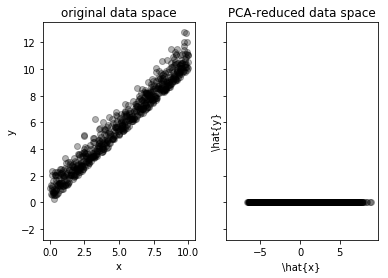

In [9]:

fig,axs=subplots(1,2,sharey=True)
ax=axs[0]
x1 = np.arange(0, 10, .01/1.2)
x2 = x1+np.random.normal(loc=0, scale=1, size=len(x1))
X = np.c_[(x1, x2)]
good = x1>x2
bad = ~good 
_=ax.plot(x1[good],x2[good],'ow',alpha=.3)
_=ax.plot(x1[bad],x2[bad],'ok',alpha=.3)
_=ax.set_title("original data space")
_=ax.set_xlabel("x")
_=ax.set_ylabel("y")

_=pca.fit(X)
Xx=pca.fit_transform(X)
ax=axs[1]
_=ax.plot(Xx[good,0],Xx[good,1]*0,'ow',alpha=.3)
_=ax.plot(Xx[bad,0],Xx[bad,1]*0,'ok',alpha=.3)
_=ax.set_title("PCA-reduced data space")
_=ax.set_xlabel(r"\hat{x}")
_=ax.set_ylabel(r"\hat{y}")


<!-- dom:FIGURE: [fig-machine_learning/pca_004.png, width=500 frac=0.85]  As
compared with [Figure](#fig:pca_003), the two classes differ along the
coordinate direction that is orthogonal to the principal component. As a result,
the two classes are no longer distinguishable after transformation. <div
id="fig:pca_004"></div>  -->
<!-- begin figure -->
<div id="fig:pca_004"></div>

<p>As compared with [Figure](#fig:pca_003), the two classes differ along the
coordinate direction that is orthogonal to the principal component. As a result,
the two classes are no longer distinguishable after transformation.</p>
<img src="fig-machine_learning/pca_004.png" width=500>

<!-- end figure -->


PCA works by decomposing the covariance matrix of the data using the Singular
Value Decomposition (SVD). This decomposition exists for all matrices and
returns the following factorization for an arbitrary matrix $\mathbf{A}$,

$$
\mathbf{A} =  \mathbf{U} \mathbf{S}  \mathbf{V}^T
$$

 Because of the symmetry of the covariance matrix, $\mathbf{U} =
\mathbf{V}$. The elements of the diagonal matrix $\mathbf{S}$ are the singular
values of $\mathbf{A}$ whose squares are the eigenvalues of $\mathbf{A}^T
\mathbf{A}$. The eigenvector matrix $\mathbf{U}$ is orthogonal: $\mathbf{U}^T
\mathbf{U} =\mathbf{I}$. The singular values are in decreasing order so that
the first column of $\mathbf{U}$ is the axis corresponding to the largest
singular value. This is the first dominant column that PCA identifies. The
entries of the covariance matrix are of the form $\mathbb{E}(x_i x_j)$ where
$x_i$ and $x_j$ are different features [^covariance]. This means that the
covariance matrix is filled with entries that attempt to uncover mutually
correlated relationships between all pairs of columns of the feature matrix.
Once these have been tabulated in the covariance matrix, the SVD finds optimal
orthogonal transformations to align the components along the directions most
strongly associated with these correlated relationships. Simultaneously,
because orthogonal matrices have columns of unit-length, the SVD collects the
absolute squared lengths of these components into the $\mathbf{S}$ matrix.  In
our example above in [Figure](#fig:pca_003), the two feature vectors were
obviously correlated along the
diagonal, meaning that PCA selected that diagonal direction as the principal
component.

[^covariance]: Note that these entries are constructed from the data
using an estimator of the covariance matrix because we do not have
the full probability densities at hand.

We have seen that PCA is a powerful dimension reduction method that is
invariant to linear transformations of the original feature space. However,
this method performs poorly with transformations that are nonlinear. In that
case, there are a wide range of extensions to PCA, such as Kernel PCA, that are
available in Scikit-learn, which allow for embedding parameterized
non-linearities into the PCA at the risk of overfitting.

## Independent Component Analysis

Independent Component Analysis (ICA) via the `FastICA` algorithm is also
available in Scikit-learn. This method is fundamentally different from PCA
in that it is the small differences between components that are emphasized,
not the large principal components.  This method is adopted from signal
processing.  Consider a matrix of signals ($\mathbf{X}$) where the rows are
the samples and the columns are the different signals. For example, these
could be EKG signals from multiple leads on a single patient. The analysis
starts with the following model,

<!-- Equation labels as ordinary links -->
<div id="eq:ICA"></div>

$$
\begin{equation}
\mathbf{X} =  \mathbf{S}\mathbf{A}^T
\label{eq:ICA} \tag{1}
\end{equation}
$$

 In other words, the observed signal matrix is an unknown mixture
($\mathbf{A}$) of some set of conformable, independent random sources
$\mathbf{S}$,

$$
\mathbf{S}=\left[ \mathbf{s}_1(t),\mathbf{s}_2(t),\ldots,\mathbf{s}_n(t)\right]
$$

 The distribution on the random sources is otherwise unknown, except
there can be at most one Gaussian source, otherwise, the mixing matrix
$\mathbf{A}$ cannot be identified because of technical reasons.  The problem in
ICA is to find $\mathbf{A}$ in Equation [eq:ICA](#eq:ICA) and thereby un-mix the
$s_i(t)$ signals, but this cannot be solved without a strategy to reduce the
inherent arbitrariness in this formulation.

To make this concrete, let us simulate the situation with the following code,

In [10]:
np.random.seed(123456)

In [11]:
from numpy import matrix, c_, sin, cos, pi
t = np.linspace(0,1,250)
s1 = sin(2*pi*t*6)
s2 =np.maximum(cos(2*pi*t*3),0.3)
s2 = s2 - s2.mean()
s3 = np.random.randn(len(t))*.1

# normalize columns
s1=s1/np.linalg.norm(s1)
s2=s2/np.linalg.norm(s2)
s3=s3/np.linalg.norm(s3)
S =c_[s1,s2,s3] # stack as columns

# mixing matrix
A = matrix([[  1,  1,1],
            [0.5, -1,3],
            [0.1, -2,8]])
X= S*A.T # do mixing

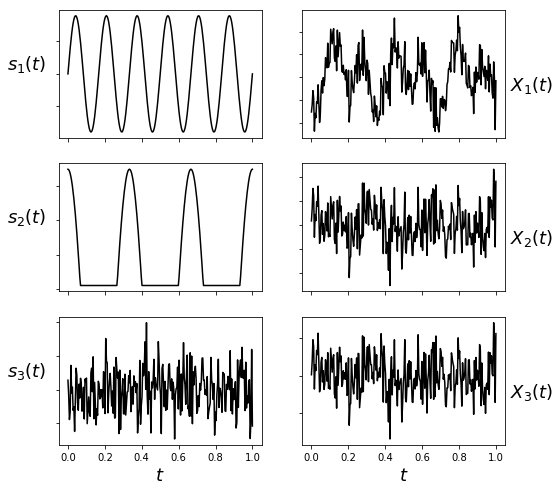

In [12]:
fig,axs=subplots(3,2,sharex=True)
fig.set_size_inches((8,8))
X = np.array(X)

_=axs[0,1].plot(t,-X[:,0],'k-')
_=axs[1,1].plot(t,-X[:,1],'k-')
_=axs[2,1].plot(t,-X[:,2],'k-')
_=axs[0,0].plot(t,s1,'k-')
_=axs[1,0].plot(t,s2,'k-')
_=axs[2,0].plot(t,s3,'k-')

_=axs[2,0].set_xlabel('$t$',fontsize=18)
_=axs[2,1].set_xlabel('$t$',fontsize=18)
_=axs[0,0].set_ylabel('$s_1(t)$        ',fontsize=18,rotation='horizontal')
_=axs[1,0].set_ylabel('$s_2(t)$        ',fontsize=18,rotation='horizontal')
_=axs[2,0].set_ylabel('$s_3(t)$        ',fontsize=18,rotation='horizontal')
for ax in axs.flatten():
    _=ax.yaxis.set_ticklabels('')

_=axs[0,1].set_ylabel('        $X_1(t)$',fontsize=18,rotation='horizontal')
_=axs[1,1].set_ylabel('        $X_2(t)$',fontsize=18,rotation='horizontal')
_=axs[2,1].set_ylabel('        $X_3(t)$',fontsize=18,rotation='horizontal')
_=axs[0,1].yaxis.set_label_position("right")
_=axs[1,1].yaxis.set_label_position("right")
_=axs[2,1].yaxis.set_label_position("right")


<!-- dom:FIGURE: [fig-machine_learning/pca_008.png, width=500 frac=0.85] The
left column shows the original signals and the right column shows the mixed
signals. The object of ICA is to recover the left column from the right. <div
id="fig:pca_008"></div>  -->
<!-- begin figure -->
<div id="fig:pca_008"></div>

<p>The left column shows the original signals and the right column shows the
mixed signals. The object of ICA is to recover the left column from the
right.</p>
<img src="fig-machine_learning/pca_008.png" width=500>

<!-- end figure -->


 The individual signals ($s_i(t)$) and their mixtures ($X_i(t)$) are
shown in [Figure](#fig:pca_008). To recover the individual signals using ICA,
we use the `FastICA` object and fit the parameters on the `X` matrix,

In [13]:
from sklearn.decomposition import FastICA
ica = FastICA()
# estimate unknown S matrix
S_=ica.fit_transform(X)

The results of this estimation are shown in [Figure](#fig:pca_009),
showing that ICA is able to recover the original signals from the observed
mixture. Note that ICA is unable to distinguish the signs of the recovered
signals or preserve the order of the input signals.

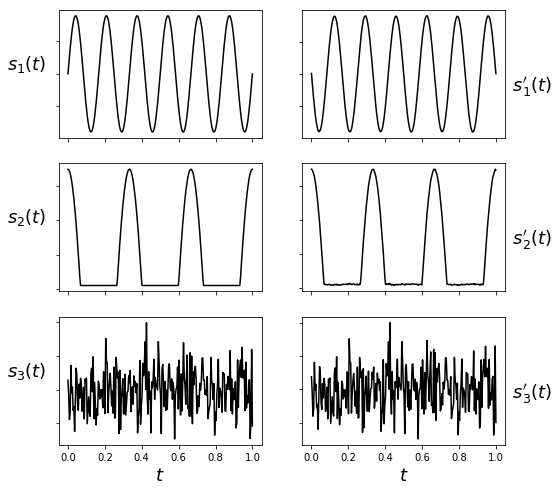

In [14]:
fig,axs=subplots(3,2,sharex=True)
fig.set_size_inches((8,8))
X = np.array(X)

_=axs[0,1].plot(t,-S_[:,2],'k-')
_=axs[1,1].plot(t,-S_[:,1],'k-')
_=axs[2,1].plot(t,-S_[:,0],'k-')
_=axs[0,0].plot(t,s1,'k-')
_=axs[1,0].plot(t,s2,'k-')
_=axs[2,0].plot(t,s3,'k-')

_=axs[2,0].set_xlabel('$t$',fontsize=18)
_=axs[2,1].set_xlabel('$t$',fontsize=18)
_=axs[0,0].set_ylabel('$s_1(t)$        ',fontsize=18,rotation='horizontal')
_=axs[1,0].set_ylabel('$s_2(t)$        ',fontsize=18,rotation='horizontal')
_=axs[2,0].set_ylabel('$s_3(t)$        ',fontsize=18,rotation='horizontal')
for ax in axs.flatten():
    _=ax.yaxis.set_ticklabels('')

_=axs[0,1].set_ylabel('        $s_1^\prime(t)$',fontsize=18,rotation='horizontal')
_=axs[1,1].set_ylabel('        $s_2^\prime(t)$',fontsize=18,rotation='horizontal')
_=axs[2,1].set_ylabel('        $s_3^\prime(t)$',fontsize=18,rotation='horizontal')
_=axs[0,1].yaxis.set_label_position("right")
_=axs[1,1].yaxis.set_label_position("right")
_=axs[2,1].yaxis.set_label_position("right")


<!-- dom:FIGURE: [fig-machine_learning/pca_009.png, width=500 frac=0.85] The
left column shows the original signals and the right column shows the signals
that ICA was able to recover. They match exactly, outside of a possible sign
change. <div id="fig:pca_009"></div>  -->
<!-- begin figure -->
<div id="fig:pca_009"></div>

<p>The left column shows the original signals and the right column shows the
signals that ICA was able to recover. They match exactly, outside of a possible
sign change.</p>
<img src="fig-machine_learning/pca_009.png" width=500>

<!-- end figure -->


To develop some intuition as to how ICA accomplishes this feat, consider the
following two-dimensional situation with two uniformly distributed independent
variables, $u_x,u_y \sim \mathcal{U}[0,1]$. Suppose we apply the
following orthogonal rotation matrix to these variables,

$$
\begin{bmatrix}
u_x^\prime \\\
u_y^\prime
\end{bmatrix}=
\begin{bmatrix}
\cos(\phi) & -\sin(\phi) \\\
\sin(\phi) & \cos(\phi)
\end{bmatrix}
\begin{bmatrix}
u_x \\\
u_y
\end{bmatrix}
$$

<!-- dom:FIGURE: [fig-machine_learning/pca_005.png, width=500 frac=0.85] The
left panel shows two classes labeled on the $u_x,u_y$ uniformly independent
random variables. The right panel shows these random variables after a rotation,
which removes their mutual independence and makes it hard to separate the two
classes along the coordinate directions. <div id="fig:pca_005"></div>  -->
<!-- begin figure -->
<div id="fig:pca_005"></div>

<p>The left panel shows two classes labeled on the $u_x,u_y$ uniformly
independent random variables. The right panel shows these random variables after
a rotation, which removes their mutual independence and makes it hard to
separate the two classes along the coordinate directions.</p>
<img src="fig-machine_learning/pca_005.png" width=500>

<!-- end figure -->


 The so-rotated variables $u_x^\prime,u_y^\prime$ are no longer
independent, as shown in [Figure](#fig:pca_005). Thus, one way to think about
ICA is as a search through orthogonal matrices so that the independence is
restored. This is where the prohibition against Gaussian distributions arises.
The two dimensional Gaussian distribution of independent variables is
proportional the following,

$$
f(\mathbf{x})\propto\exp(-\frac{1}{2}\mathbf{x}^T \mathbf{x})
$$

 Now, if we similarly rotated the $\mathbf{x}$ vector as,

$$
\mathbf{y} = \mathbf{Q} \mathbf{x}
$$

 the resulting density for $\mathbf{y}$ is obtained by plugging in
the following,

$$
\mathbf{x} = \mathbf{Q}^T \mathbf{y}
$$

 because the inverse of an orthogonal matrix is its transpose, we
obtain

$$
f(\mathbf{y})\propto\exp(-\frac{1}{2}\mathbf{y}^T \mathbf{Q}\mathbf{Q}^T
\mathbf{y})=\exp(-\frac{1}{2}\mathbf{y}^T \mathbf{y})
$$

 In other words, the transformation is lost on the $\mathbf{y}$
 variable. This means that ICA cannot search over orthogonal transformations if
 it is blind to them, which explains the restriction of Gaussian random
 variables. Thus, ICA is a method that seeks to maximize the non-Gaussian-ness
 of the transformed random variables.  There are many methods to doing this,
 some of which involve cumulants and others that use the
*negentropy*,

$$
\mathcal{J}(Y) = \mathcal{H}(Z)-\mathcal{H}(Y)
$$

 where $\mathcal{H}(Z)$ is the information entropy of the
Gaussian random variable $Z$ that has the same variance as $Y$. Further
details would take us beyond our scope, but that is the outline of how
the FastICA algorithm works.

The implementation of this method in Scikit-learn includes two different ways
of extracting more than one independent source component. The *deflation*
method iteratively extracts one component at a time using a incremental
normalization step. The *parallel* method also uses the single-component method
but carries out normalization of all the components simultaneously, instead of
for just the newly computed component.  Because ICA extracts
independent components, a whitening step is used beforehand to balance the
correlated components from the data matrix. Whereas PCA returns
uncorrelated components along dimensions optimal for Gaussian random
variables, ICA returns components that are as far from the Gaussian density
as possible.

The left panel on [Figure](#fig:pca_005) shows the orignal uniform random
sources. The white and black colors distinguish between two classes. The right
panel shows the mixture of these sources, which is what we observe as input
features. The top row of [Figure](#fig:pca_006) shows the PCA (left) and ICA
(right) transformed data spaces.  Notice that ICA is able to un-mix the two
random sources whereas PCA transforms along the dominant diagonal. Because ICA
is able to preserve the class membership, the data space can be reduced to two
non-overlapping sections, as shown. However, PCA cannot achieve a similiar
separation because the classes are mixed along the dominant diagonal that PCA
favors as the main component in the decomposition.

<!-- dom:FIGURE: [fig-machine_learning/pca_006.png, width=500 frac=0.85]  The
panel on the top left shows two classes in a plane after a  rotation. The bottom
left panel shows the result of dimensionality reduction using PCA, which causes
mixing between the two classes. The top right panel shows the ICA transformed
output and the lower right panel shows that, because ICA was able to un-rotate
the data, the lower dimensional data maintains the separation between the
classes. <div id="fig:pca_006"></div>  -->
<!-- begin figure -->
<div id="fig:pca_006"></div>

<p>The panel on the top left shows two classes in a plane after a  rotation. The
bottom left panel shows the result of dimensionality reduction using PCA, which
causes mixing between the two classes. The top right panel shows the ICA
transformed output and the lower right panel shows that, because ICA was able to
un-rotate the data, the lower dimensional data maintains the separation between
the classes.</p>
<img src="fig-machine_learning/pca_006.png" width=500>

<!-- end figure -->


For a good principal component analysis treatment, see
[[richert2013building]](#richert2013building),
[[alpaydin2014introduction]](#alpaydin2014introduction),
[[cuesta2013practical]](#cuesta2013practical), and
[[izenman2008modern]](#izenman2008modern). Independent Component Analysis is
discussed in more detail
in [[hyvarinen2004independent]](#hyvarinen2004independent).

<!-- #  *Learning from Data*, p. 263 -->
<!-- #  *Building machine learning systems*, p.231 -->
<!-- #  *Introduction to machine learning by Alpaydin*, p148 -->
<!-- #  *Practical Data Analysis Cuesta*,p.143 -->
<!-- #  *Modern Multivariate statistical techniques Izenman*, p.553, 558 -->
<!-- #  *Independent Component Analysis Hyvarinen.pdf*, p.147 -->

# Ensemble Learning

<!-- new sections -->
<!-- Ensemble learning -->
<!-- - Machine Learning Flach, Ch.11 -->
<!-- - Machine Learning Mohri, pp.135- -->
<!-- - Data Mining Witten, Ch. 8 -->

In [2]:
from pprint import pprint
import textwrap
import sys, re
def displ(x):
   if x is None: return
   print ("\n".join(textwrap.wrap(repr(x).replace(' ',''),width=80)))

sys.displayhook=displ

With the exception of the random forest, we have so far considered machine
learning models as stand-alone entities. Combinations of models that jointly
produce a classification are known as *ensembles*.  There are two main
methodologies that create ensembles: *bagging* and *boosting*.

## Bagging

Bagging refers to bootstrap aggregating, where bootstrap here is the same as we
discussed in the section [ch:stats:sec:boot](#ch:stats:sec:boot).  Basically,
we resample the data with replacement and then train a classifier on the newly
sampled data. Then, we combine the outputs of each of the individual
classifiers using a majority-voting scheme (for discrete outputs) or a weighted
average (for continuous outputs).  This combination is particularly effective
for models that are easily influenced by a single data element. The resampling
process means that these elements cannot appear in every bootstrapped
training set so that some of the models will not suffer these effects. This
makes the so-computed combination of outputs less volatile. Thus, bagging
helps reduce the collective variance of individual high-variance models.

To get a sense of bagging, let's suppose we have a two-dimensional plane that
is partitioned into two regions with the following boundary: $y=-x+x^2$.
Pairs of $(x_i,y_i)$ points above this boundary are labeled one and points
below are labeled zero. [Figure](#fig:ensemble_001) shows the two regions
with the  nonlinear separating boundary as the black curved line.

<!-- dom:FIGURE: [fig-machine_learning/ensemble_001.png, width=500 frac=0.75]
Two regions in the plane are separated by a nonlinear boundary. The training
data is sampled from this plane. The objective is to correctly classify the so-
sampled data.   <div id="fig:ensemble_001"></div> -->
<!-- begin figure -->
<div id="fig:ensemble_001"></div>

<p>Two regions in the plane are separated by a nonlinear boundary. The training
data is sampled from this plane. The objective is to correctly classify the so-
sampled data.</p>
<img src="fig-machine_learning/ensemble_001.png" width=500>

<!-- end figure -->




The problem is to take samples from each of these regions and
classify them correctly using a perceptron. A perceptron is the simplest
possible linear classifier that finds a line in the plane to separate two
purported categories. Because the separating boundary is nonlinear, there is no
way that the perceptron can completely solve this problem. The following code
sets up the perceptron available in Scikit-learn.

In [3]:
from sklearn.linear_model import Perceptron
p=Perceptron()
p

/usr/local/miniconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=5, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

The training data and the resulting perceptron separating boundary
are shown in [Figure](#fig:ensemble_002). The circles and crosses are the
sampled training data and the gray separating line is the perceptron's
separating boundary between the two categories. The black squares are those
elements in the training data that the perceptron mis-classified. Because the
perceptron can only produce linear separating boundaries, and the boundary in
this case is non-linear, the perceptron makes mistakes near where the
boundary curves.  The next step is to see how bagging can
improve upon this by using multiple perceptrons.

<!-- dom:FIGURE: [fig-machine_learning/ensemble_002.png, width=500 frac=0.75]
The perceptron finds the best linear boundary between the two classes. <div
id="fig:ensemble_002"></div> -->
<!-- begin figure -->
<div id="fig:ensemble_002"></div>

<p>The perceptron finds the best linear boundary between the two classes.</p>
<img src="fig-machine_learning/ensemble_002.png" width=500>

<!-- end figure -->


The following code sets up the bagging classifier in Scikit-learn. Here we
select only three perceptrons. [Figure](#fig:ensemble_003) shows each of the
three individual classifiers and the final bagged classifer in the panel on the
bottom right. As before, the black circles indicate misclassifications in the
training data. Joint classifications are determined by majority voting.

In [4]:
from sklearn.ensemble import BaggingClassifier
bp = BaggingClassifier(Perceptron(),max_samples=0.50,n_estimators=3)
bp

BaggingClassifier(base_estimator=Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=5, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.5, n_estimators=3, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

<!-- dom:FIGURE: [fig-machine_learning/ensemble_003.png, width=500 frac=0.85]
Each panel with the single gray line is one of the perceptrons used for the
ensemble bagging classifier on the lower right. <div
id="fig:ensemble_003"></div> -->
<!-- begin figure -->
<div id="fig:ensemble_003"></div>

<p>Each panel with the single gray line is one of the perceptrons used for the
ensemble bagging classifier on the lower right.</p>
<img src="fig-machine_learning/ensemble_003.png" width=500>

<!-- end figure -->


The `BaggingClassifier` can estimate its own out-of-sample error if passed the
`oob_score=True` flag upon construction. This keeps track of which samples were
used for training and which were not, and then estimates the out-of-sample
error using those samples that were unused in training. The `max_samples`
keyword argument specifies the number of items from the training set to use for
the base classifier. The smaller the `max_samples` used in the bagging
classifier, the better the out-of-sample error estimate, but at the cost of
worse in-sample performance. Of course, this depends on the overall number of
samples and the degrees-of-freedom in each individual classifier. The
VC-dimension surfaces again!

## Boosting


As we discussed, bagging is particularly effective for individual high-variance
classifiers because the final majority-vote tends to smooth out the individual
classifiers and produce a more stable collaborative solution. On the other
hand, boosting is particularly effective for high-bias classifiers that are
slow to adjust to new data. On the one hand, boosting is similiar to bagging in
that it uses a majority-voting (or averaging for numeric prediction) process at
the end; and it also combines individual classifiers of the same type. On the
other hand, boosting is serially iterative, whereas the individual classifiers
in bagging can be trained in parallel.  Boosting uses the misclassifications of
prior iterations to influence the training of the next iterative classifier by
weighting those misclassifications more heavily in subsequent steps. This means
that, at every step, boosting focuses more and more on specific
misclassifications up to that point, letting the prior classifications
be carried by earlier iterations.


The primary implementation for boosting in Scikit-learn is the Adaptive
Boosting (*AdaBoost*) algorithm, which does classification
(`AdaBoostClassifier`) and regression (`AdaBoostRegressor`).  The first step in
the basic AdaBoost algorithm is to initialize the weights over each of the
training set indicies, $D_0(i)=1/n$ where there are $n$ elements in the
training set. Note that this creates a discrete uniform distribution over the
*indicies*, not over the training data $\lbrace (x_i,y_i) \rbrace$ itself. In
other words, if there are repeated elements in the training data, then each
gets its own weight. The next step is to train the base classifer $h_k$ and
record the classification error at the $k^{th}$ iteration, $\epsilon_k$. Two
factors can next be calculated using $\epsilon_k$,

$$
\alpha_k = \frac{1}{2}\log \frac{1-\epsilon_k}{\epsilon_k}
$$

 and the normalization factor,

$$
Z_k = 2 \sqrt{ \epsilon_k (1- \epsilon_k) }
$$

 For the next step, the weights over the training data are updated as
in the following,

$$
D_{k+1}(i) = \frac{1}{Z_k} D_k(i)\exp{(-\alpha_k y_i h_k(x_i))}
$$

 The final classification result is assembled using the $\alpha_k$
factors, $g = \sgn(\sum_{k} \alpha_k h_k)$.

To re-do the problem above using boosting with perceptrons, we set up the
AdaBoost classifier in the following,

In [5]:
from sklearn.ensemble import AdaBoostClassifier
clf=AdaBoostClassifier(Perceptron(),n_estimators=3,
                       algorithm='SAMME',
                       learning_rate=0.5)
clf

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=5, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False),
          learning_rate=0.5, n_estimators=3, random_state=None)